In [1]:
import pandas_datareader as data
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout
import matplotlib.pyplot as plt

In [2]:
start = '2010-10-01'
end = '2021-12-31'

df = data.DataReader('BTC-USD', 'yahoo', start, end)
df.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2014-09-17,468.174011,452.421997,465.864014,457.334015,21056800,457.334015
2014-09-18,456.859985,413.104004,456.859985,424.440002,34483200,424.440002
2014-09-19,427.834991,384.532013,424.102997,394.795990,37919700,394.795990
2014-09-20,423.295990,389.882996,394.673004,408.903992,36863600,408.903992
2014-09-21,412.425995,393.181000,408.084991,398.821014,26580100,398.821014


In [3]:
df = df.reset_index()
df.head()

,Date,High,Low,Open,Close,Volume,Adj Close
0,2014-09-17,468.174011,452.421997,465.864014,457.334015,21056800,457.334015
1,2014-09-18,456.859985,413.104004,456.859985,424.440002,34483200,424.440002
2,2014-09-19,427.834991,384.532013,424.102997,394.795990,37919700,394.795990
3,2014-09-20,423.295990,389.882996,394.673004,408.903992,36863600,408.903992
4,2014-09-21,412.425995,393.181000,408.084991,398.821014,26580100,398.821014


In [4]:
df = df.drop(['Date', 'Adj Close'], axis = 1)
df.head()

,High,Low,Open,Close,Volume
0,468.174011,452.421997,465.864014,457.334015,21056800
1,456.859985,413.104004,456.859985,424.440002,34483200
2,427.834991,384.532013,424.102997,394.795990,37919700
3,423.295990,389.882996,394.673004,408.903992,36863600
4,412.425995,393.181000,408.084991,398.821014,26580100


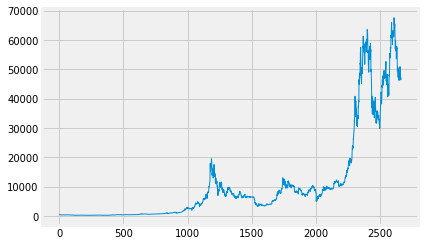

In [5]:
plt.plot(df.Close,  linewidth=1)

In [6]:
ma100 = df.Close.rolling(100).mean()
ma100

0                NaN
1                NaN
2                NaN
3                NaN
4                NaN
            ...     
2658    54702.148125
2659    54705.434492
2660    54741.443594
2661    54806.288086
2662    54833.607461
Name: Close, Length: 2663, dtype: float64

In [7]:
ma200 = df.Close.rolling(200).mean()
ma200

0                NaN
1                NaN
2                NaN
3                NaN
4                NaN
            ...     
2658    47645.100508
2659    47696.372793
2660    47750.833770
2661    47791.235098
2662    47821.674941
Name: Close, Length: 2663, dtype: float64

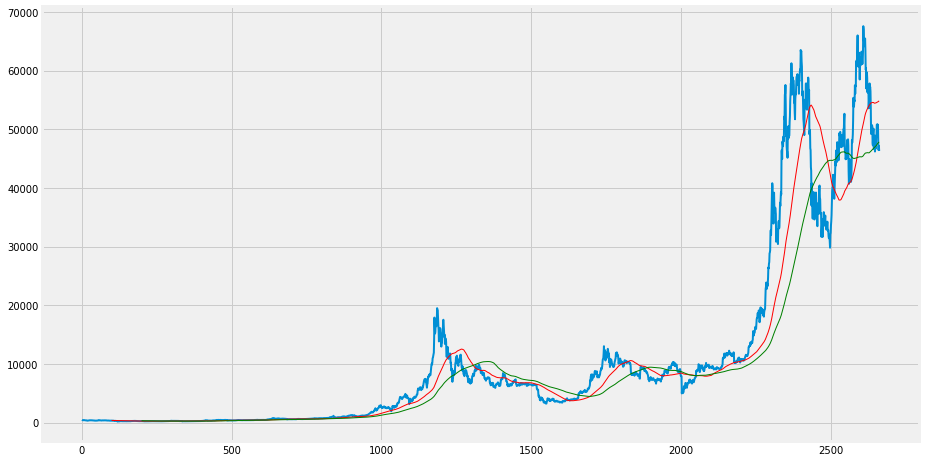

In [8]:
plt.figure(figsize = (14, 8))
plt.plot(df.Close,  linewidth=2)
plt.plot(ma100, 'r',  linewidth=1)
plt.plot(ma200, 'g',  linewidth=1)

In [9]:
df.shape

(2663, 5)

In [10]:
# splittling data into training and testing

data_training = pd.DataFrame(df['Close'][0:int(len(df)*0.7)])
data_testing = pd.DataFrame(df['Close'][int(len(df)*0.7):int(len(df))])
                                        
print(data_training.shape)
print(data_testing.shape)

(1864, 1)
(799, 1)


In [11]:
scaler = MinMaxScaler(feature_range=(0, 1))

In [12]:
data_training_array = scaler.fit_transform(data_training)
data_training_array

array([[0.01445348],
       [0.01275083],
       [0.0112164 ],
       ...,
       [0.40892275],
       [0.3797534 ],
       [0.37865693]])

In [13]:
data_training_array.shape

(1864, 1)

In [14]:
X_train = []
Y_train = []

for i in range(100, data_training_array.shape[0]):
    X_train.append(data_training_array[i-100: i])
    Y_train.append(data_training_array[i, 0])
    
X_train, Y_train = np.array(X_train), np.array(Y_train)

In [15]:
X_train.shape, Y_train.shape

((1764, 100, 1), (1764,))

In [16]:
model = Sequential()

model.add(LSTM(units = 50, activation = 'relu', return_sequences = True, input_shape = (X_train.shape[1], 1)))
model.add(Dropout(0.2))


model.add(LSTM(units = 60, activation = 'relu', return_sequences = True))
model.add(Dropout(0.3))


model.add(LSTM(units = 800, activation = 'relu', return_sequences = True))
model.add(Dropout(0.4))


model.add(LSTM(units = 120, activation = 'relu'))
model.add(Dropout(0.5))


model.add(Dense(units = 1))


In [17]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 dropout (Dropout)           (None, 100, 50)           0         
                                                                 
 lstm_1 (LSTM)               (None, 100, 60)           26640     
                                                                 
 dropout_1 (Dropout)         (None, 100, 60)           0         
                                                                 
 lstm_2 (LSTM)               (None, 100, 800)          2755200   
                                                                 
 dropout_2 (Dropout)         (None, 100, 800)          0         
                                                                 
 lstm_3 (LSTM)               (None, 120)               4

In [18]:
model.compile(optimizer = 'adam', loss = 'mean_squared_error')
model.fit(X_train, Y_train, epochs = 10)

Epoch 1/10
56/56 [==============================] - 124s 2s/step - loss: 0.0155
Epoch 2/10
56/56 [==============================] - 111s 2s/step - loss: 0.0047
Epoch 3/10
56/56 [==============================] - 114s 2s/step - loss: 0.0046
Epoch 4/10
56/56 [==============================] - 112s 2s/step - loss: 0.0046
Epoch 5/10
56/56 [==============================] - 122s 2s/step - loss: 0.0044
Epoch 6/10
56/56 [==============================] - 115s 2s/step - loss: 0.0039
Epoch 7/10
56/56 [==============================] - 107s 2s/step - loss: 0.0037
Epoch 8/10
56/56 [==============================] - 115s 2s/step - loss: 0.0033
Epoch 9/10
56/56 [==============================] - 111s 2s/step - loss: 0.0033
Epoch 10/10
56/56 [==============================] - 108s 2s/step - loss: 0.0031


In [38]:
model.save('keras_model.h5')

In [43]:
data_testing.head()

(799, 1)

In [40]:
past_100_days = data_training.tail(100)

In [41]:
final_df = pd.concat([past_100_days, data_testing])

In [45]:
final_df.head() 


,Close
1764,9693.802734
1765,10666.482422
1766,10530.732422
1767,10767.139648
1768,10599.105469


In [46]:
input_data = scaler.fit_transform(final_df)
input_data

array([[7.54522913e-02],
       [9.09912885e-02],
       [8.88226209e-02],
       [9.25993331e-02],
       [8.99149112e-02],
       [8.58252112e-02],
       [7.87586481e-02],
       [7.73393603e-02],
       [7.89355638e-02],
       [7.82719741e-02],
       [7.19995969e-02],
       [7.32006731e-02],
       [7.26620633e-02],
       [7.40723493e-02],
       [8.17118757e-02],
       [8.67288227e-02],
       [8.86220073e-02],
       [9.34713837e-02],
       [9.58430674e-02],
       [1.09190058e-01],
       [1.03958347e-01],
       [1.11367758e-01],
       [1.11758174e-01],
       [1.10105183e-01],
       [1.01975082e-01],
       [1.04683795e-01],
       [1.02431849e-01],
       [9.46552208e-02],
       [8.11699272e-02],
       [8.53210173e-02],
       [8.63241633e-02],
       [8.40461481e-02],
       [8.58684105e-02],
       [9.49783025e-02],
       [9.25369134e-02],
       [8.25493388e-02],
       [8.24376043e-02],
       [8.68613534e-02],
       [8.28993791e-02],
       [8.25568117e-02],


In [48]:
input_data.shape

(899, 1)

In [52]:
X_test = []
Y_test = []

for i in range(100, input_data.shape[0]):
    X_test.append(input_data[i-100: i])
    Y_test.append(input_data[i, 0])
    
    
X_test, Y_test = np.array(X_test), np.array(Y_test)

X_test.shape, Y_test.shape

((799, 100, 1), (799,))

In [53]:
# making predictions

Y_predicted = model.predict(X_test)

25/25 [==============================] - 10s 370ms/step


In [55]:
Y_predicted.shape

(799, 1)

In [57]:
Y_test

array([5.89480118e-02, 6.82820282e-02, 7.31823731e-02, 6.84605663e-02,
       7.12009803e-02, 6.76550541e-02, 6.75569393e-02, 6.85397415e-02,
       6.95559924e-02, 6.81283737e-02, 7.09601473e-02, 6.98405084e-02,
       7.01336985e-02, 6.86428955e-02, 6.12513630e-02, 6.13903682e-02,
       6.52555382e-02, 6.04990347e-02, 6.14235984e-02, 6.13053894e-02,
       5.97051609e-02, 5.62528252e-02, 5.71916794e-02, 5.76264489e-02,
       5.33340135e-02, 5.16862955e-02, 4.88286476e-02, 4.26857979e-02,
       3.71555381e-02, 3.87725611e-02, 3.31830720e-02, 3.47521297e-02,
       3.59061533e-02, 4.09111421e-02, 3.98159032e-02, 4.45787875e-02,
       4.15176710e-02, 3.91958404e-02, 3.75614846e-02, 3.75320455e-02,
       3.64439441e-02, 3.95794930e-02, 4.11560938e-02, 4.13037263e-02,
       4.14332461e-02, 3.88221256e-02, 3.68606631e-02, 3.58910749e-02,
       3.63017563e-02, 3.67259092e-02, 3.44092972e-02, 3.48506658e-02,
       3.13389215e-02, 2.66746435e-02, 3.68396251e-02, 3.56581047e-02,
      

In [59]:
Y_predicted

array([[0.06702324],
       [0.06598056],
       [0.06505154],
       [0.06438515],
       [0.06408606],
       [0.06422374],
       [0.06481601],
       [0.06584715],
       [0.06727022],
       [0.06899019],
       [0.07091236],
       [0.07297412],
       [0.07511206],
       [0.07727244],
       [0.07940344],
       [0.08142608],
       [0.08326988],
       [0.08490413],
       [0.0862992 ],
       [0.08744167],
       [0.08833466],
       [0.08898438],
       [0.08939275],
       [0.08957388],
       [0.08955199],
       [0.08933909],
       [0.08893407],
       [0.08833414],
       [0.08750325],
       [0.08636642],
       [0.08488113],
       [0.08301489],
       [0.08076662],
       [0.07818079],
       [0.07532725],
       [0.07229291],
       [0.06921283],
       [0.06617253],
       [0.06322652],
       [0.0604002 ],
       [0.0576951 ],
       [0.05512345],
       [0.05270968],
       [0.05046985],
       [0.04842353],
       [0.04657495],
       [0.04491575],
       [0.043

In [61]:
scaler.scale_

array([1.59754515e-05])

In [64]:
scale_factor = 1 / 1.59754515e-05
Y_predicted = Y_predicted * scale_factor
Y_test = Y_test * scale_factor

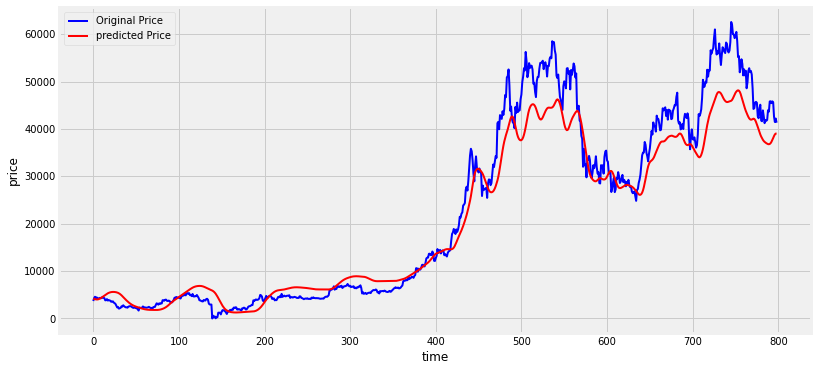

In [76]:
plt.figure(figsize=(12, 6))
plt.plot(Y_test, 'b', label = 'Original Price', linewidth=2)
plt.plot(Y_predicted, 'r', label = 'predicted Price', linewidth=2)
plt.xlabel('time')
plt.ylabel('price')
plt.legend()
plt.show()